<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Partially_APID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Partially Adaptive PID


*   Motivated from Padam and Adagrad.
*   Adagrad is based on Arithmetic Moving Average.



In [166]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [167]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [168]:
def grad_func_x1(x1):
  return 0.2*x1

In [169]:
def grad_func_x2(x2):
  return 4*x2

In [170]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = costs1 = np.array([func(X1, X2) for X1, X2 in zip(X1, X2)])

In [171]:
def Papid(lr = 0.05, Kd = 0.9, p=1/4):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1*grad_x1  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/(vt_x1 + eps)**p
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2*grad_x2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/(vt_x2 + eps)**p
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log, t

In [182]:
%%timeit
x1, x2, log1, t1 = Papid(lr=0.4, Kd=3, p=1/2)

10 loops, best of 5: 38.6 ms per loop


In [183]:
%%timeit
x1, x2, log2, t2 = Papid(lr=0.4, Kd=3, p=1/4)

100 loops, best of 5: 12.2 ms per loop


In [184]:
%%timeit
x1, x2, log3, t3 = Papid(lr=0.4, Kd=3, p=1/6)

100 loops, best of 5: 12.2 ms per loop


In [185]:
%%timeit
x1, x2, log4, t4 = Papid(lr=0.4, Kd=3, p=1/8)

100 loops, best of 5: 12.3 ms per loop


In [ ]:
%%time
x1, x2, log5, t5 = Papid(lr=0.3, Kd=3, p=1/10)

In [187]:
%%timeit
x1, x2, log6, t6 = Papid(lr=0.4, Kd=3, p=1/16)

100 loops, best of 5: 12.2 ms per loop


In [188]:
%%timeit
x1, x2, log7, t7 = Papid(lr=0.4, Kd=3, p=1/20)

100 loops, best of 5: 12.1 ms per loop


In [179]:
t1,t2,t3,t4,t5,t6,t7

(25272, 8580, 8556, 8583, 8560, 8561, 8582)

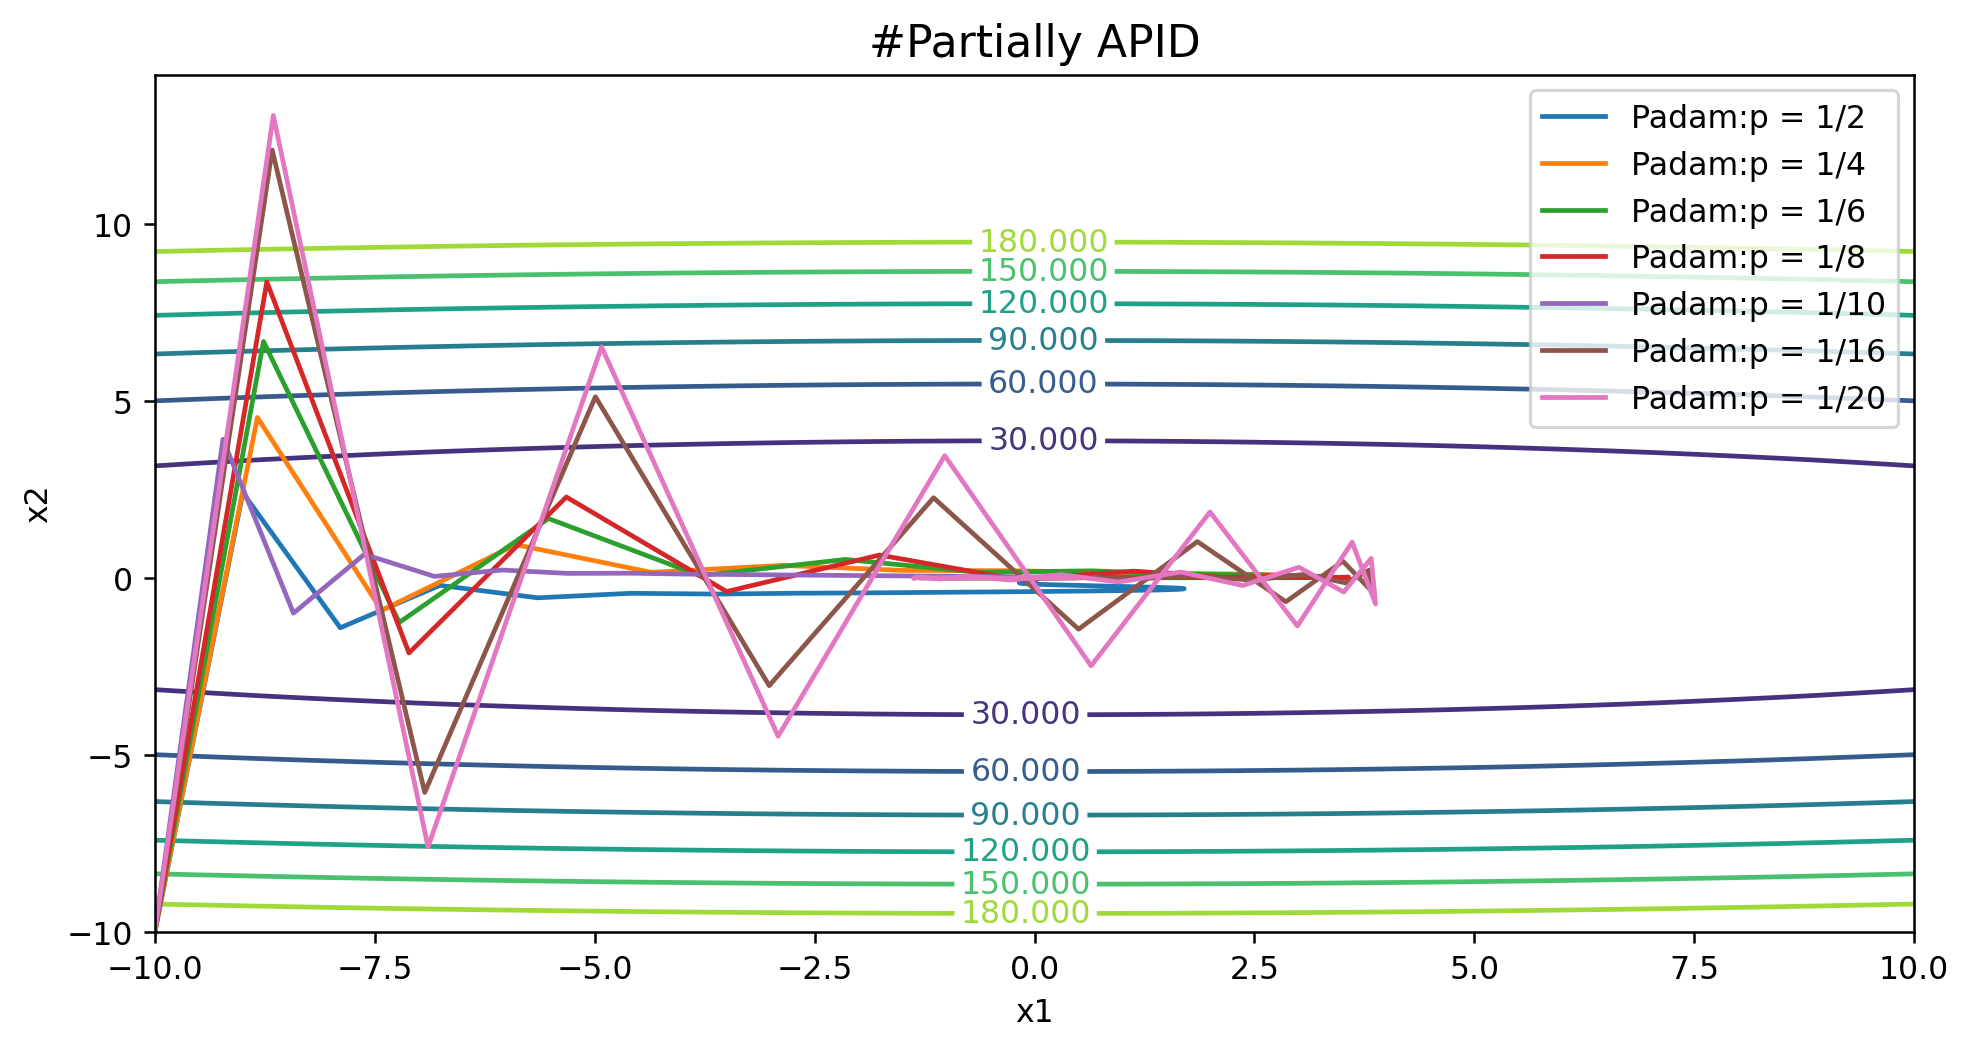

In [180]:
x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]

x_val2 = [l[0] for l in log2]
y_val2 = [l[1] for l in log2]

x_val3 = [l[0] for l in log3]
y_val3 = [l[1] for l in log3]

x_val4 = [l[0] for l in log4]
y_val4 = [l[1] for l in log4]

x_val5 = [l[0] for l in log5]
y_val5 = [l[1] for l in log5]

x_val6 = [l[0] for l in log6]
y_val6 = [l[1] for l in log6]

x_val7 = [l[0] for l in log7]
y_val7 = [l[1] for l in log7]


plt.figure(figsize=(10,5))


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')


'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''

plt.rcParams['figure.dpi'] = 227

plt.title('#Partially APID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1, y_val1, label= 'Padam:p = 1/2')
plt.plot(x_val2, y_val2, label= 'Padam:p = 1/4')
plt.plot(x_val3, y_val3, label= 'Padam:p = 1/6')
plt.plot(x_val4, y_val4, label= 'Padam:p = 1/8')
plt.plot(x_val5, y_val5, label= 'Padam:p = 1/10')
plt.plot(x_val6, y_val6, label= 'Padam:p = 1/16')
plt.plot(x_val7, y_val7, label= 'Padam:p = 1/20')

plt.legend()

plt.show()

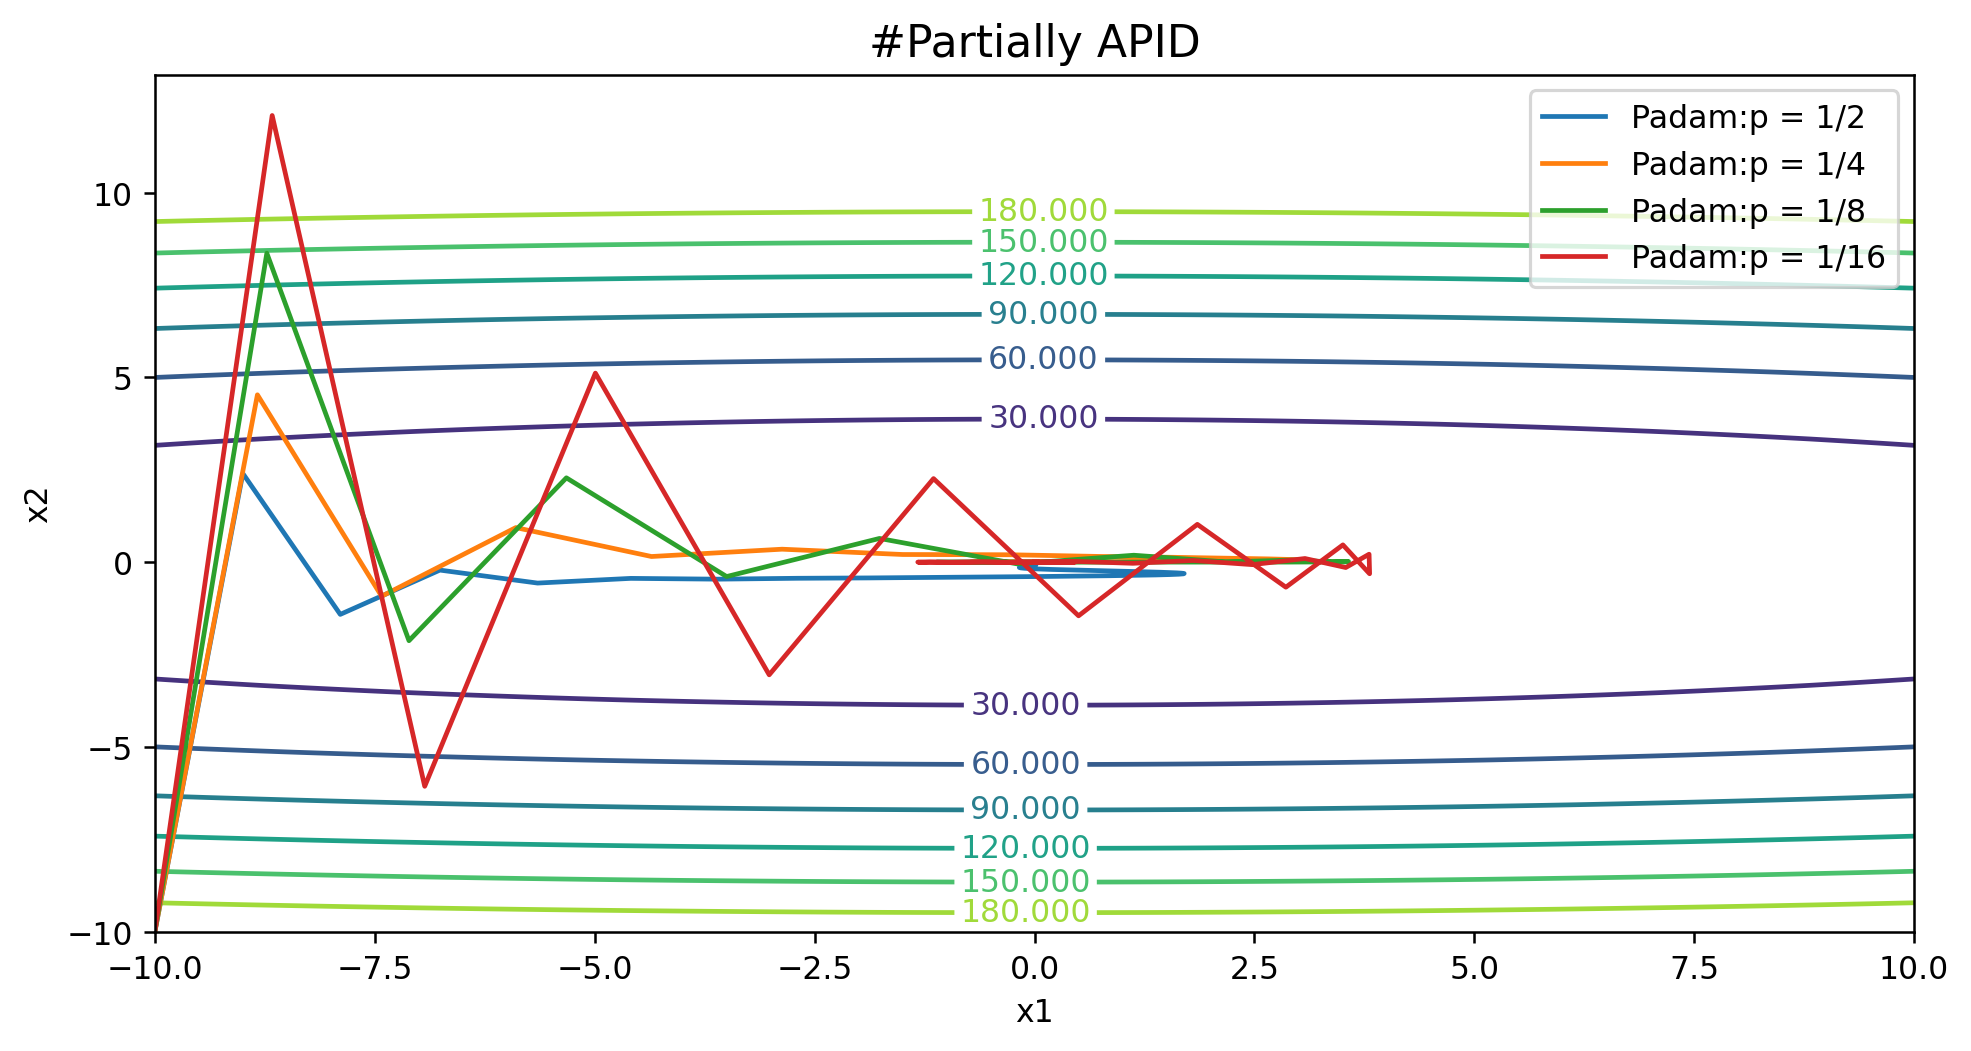

In [181]:
x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]

x_val2 = [l[0] for l in log2]
y_val2 = [l[1] for l in log2]



x_val4 = [l[0] for l in log4]
y_val4 = [l[1] for l in log4]



x_val6 = [l[0] for l in log6]
y_val6 = [l[1] for l in log6]




plt.figure(figsize=(10,5))


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')


'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''

plt.rcParams['figure.dpi'] = 227

plt.title('#Partially APID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1, y_val1, label= 'Padam:p = 1/2')
plt.plot(x_val2, y_val2, label= 'Padam:p = 1/4')
#plt.plot(x_val3, y_val3, label= 'Padam:p = 1/6')
plt.plot(x_val4, y_val4, label= 'Padam:p = 1/8')
#plt.plot(x_val5, y_val5, label= 'Padam:p = 1/10')
plt.plot(x_val6, y_val6, label= 'Padam:p = 1/16')
#plt.plot(x_val7, y_val7, label= 'Padam:p = 1/20')

plt.legend()

plt.show()